In [ ]:
!pip install tensorflow==2.4.1

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from keras.models import Sequential

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
#Set  1D tensor input  size (784,1)
input_img= Input(shape=(784,))
# one layer part of the encoder
encoded = Dense(units=2, activation='relu')(input_img)
# one layer part of the decoder 
decoded = Dense(units=784, activation='sigmoid')(encoded) 
# for the output layer we use the sigmoid function 
autoencoder=Model(input_img, decoded) # autoencoder with input image as #the input and output the final decoder layer

In [ ]:
# define the encoder model
encoder = Model(input_img, encoded)
# define the decoder 
encoded_input =Input(shape=(2,)) # the input  tensor
# last layer of the autoencodee model 
decoded_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoded_layer(encoded_input))


In [ ]:
autoencoder.summary()
encoder.summary()
#decoder.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 2)                 1570      
                                                                 
 dense_15 (Dense)            (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 2)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.4208 - accuracy: 0.0099 - val_loss: 0.2816 - val_accuracy: 0.0064
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2577 - accuracy: 0.0113 - val_loss: 0.2504 - val_accuracy: 0.0134
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2498 - accuracy: 0.0120 - val_loss: 0.2475 - val_accuracy: 0.0130
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2475 - accuracy: 0.0114 - val_loss: 0.2457 - val_accuracy: 0.0122
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2457 - accuracy: 0.0109 - val_loss: 0.2441 - val_accuracy: 0.0122
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2442 - accuracy: 0.0116 - val_loss: 0.2426 - val_accuracy: 0.0120
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2429 - accuracy: 0.0115 - val_loss: 0.2413 - val_accuracy: 0.0121
Epoch 

In [ ]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

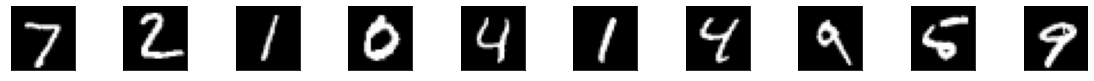

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
  ax = plt.subplot(3, 20, i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

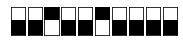

In [ ]:
for i in range(10):
  
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(2,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

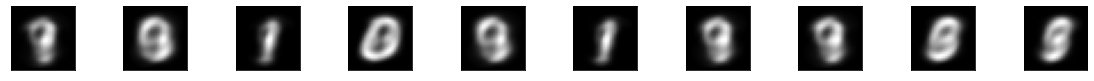

In [ ]:
plt.figure(figsize=(40,4))
for i in range(10):

  ax=plt.subplot(3,20,2*20+i+1)
  plt.imshow(predicted[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()